In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 5) # -4 ... 10 
print('SD:', SD)

SD: 0.016384000000000006


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'AMZN', 'ANET', 'APPH', 'ATVI', 'AXON', 'AYX', 
    'BILI', 'BYND', 'COUR','CPNG', 'DDOG', 'DOCU', 'DUOL', 'EDIT', 
    'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'INTG', 'ISRG', 'JD', 
    'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 'NVCR', 'OKTA', 
    'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 'ROKU', 'SE', 
    'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR', 
    'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

53

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 8, 19))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['PINS',
 'PTON',
 'QDEL',
 'RDFN',
 'RGEN',
 'ROKU',
 'SE',
 'SHOP',
 'TDOC',
 'TEAM',
 'TREX',
 '^GSPC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  12 of 12 completed
Generating derived columns...
   ...PINS
   ...PTON
   ...QDEL
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...TDOC
   ...TEAM
   ...TREX
   ...^GSPC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 PINS
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.9827902813915474
Refitting current best...
Current best ma returns: 2.1217673193924176
Fraction Invested: 0.9981994957899212
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 2.121785393929458
Invested: 0.9981994957899212
New best: 2.1218753166979383
Invested: 0.9981994957899212
New best: 2.121738944012904
Invested: 0.9981994957899212
New best: 2.1218254600264608
Invested: 0.9981994957899212
New best: 2.1221405623861216
Invested: 0.9981994957899212
New best: 2.1221080684109754
Invested: 0.9981994957899212
New best: 2.116206795787355
Invested: 0.9981994957899212
New best: 2.116098356303703
Invested: 0.9981994957899212
New best: 2.1155713734211283
Invested: 0.998199

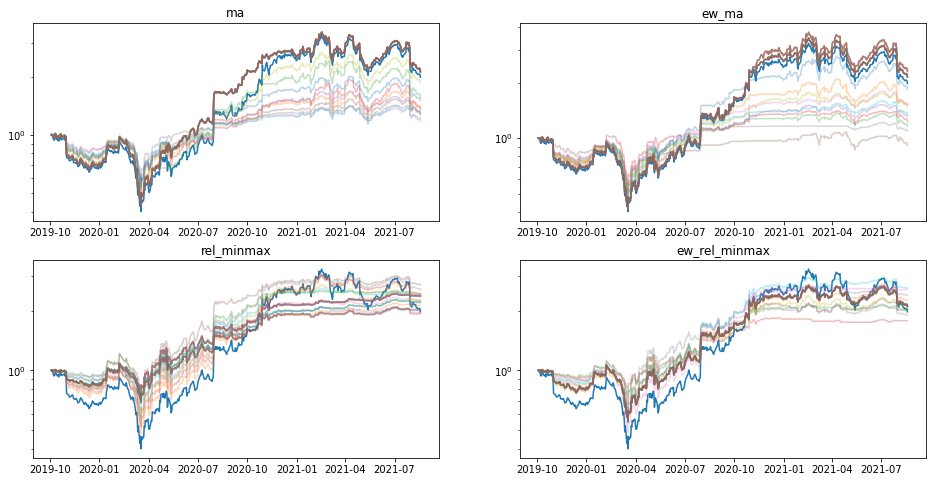

Saving PINS params...



----------------------------------------------------------------------
                                 PTON
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 3.904375473892678
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 3.904375473892678
Refitting current best...
Current best ew_ma returns: 4.807363479418541
Fraction Invested: 0.9973161543894503
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 4.807406042455563
Invested: 0.9973161543894503
New best: 4.82784112392603
Invested: 0.9973161543894503
New best: 4.8228353922928315
Invested: 0.9973161543894503
New best: 4.822574827022964
Invested: 0.9973161543894503
New best: 4.6774

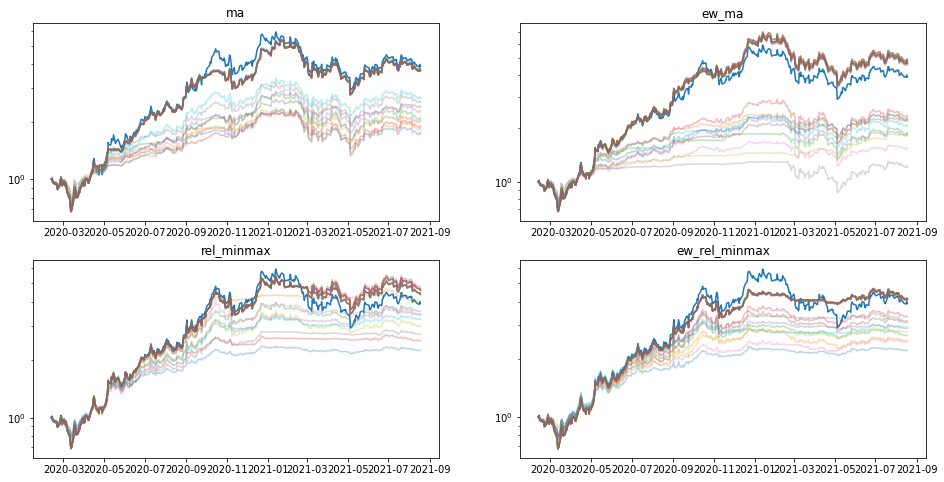

Saving PTON params...



----------------------------------------------------------------------
                                 QDEL
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 23.908861377571203
Refitting current best...
Current best ma returns: 30.958456938783893
Fraction Invested: 0.6930694712174138
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 31.248096976107245
Invested: 0.6930694712174138
New best: 24.48675734168789
Invested: 0.6930694712174138
New best: 24.50323962476737
Invested: 0.6930694712174138
New best: 24.818084492500127
Invested: 0.6930694712174138
New best: 24.818084492500127
Invested: 0.6930694712174138
New best: 24.818084492500127
Invested: 0.6930694712174138
New best: 24.65519810144547
Invested: 0.6930694712174138
New best: 24.676477209102273
Invested: 0.6930694712174138
New best: 24.68851827138

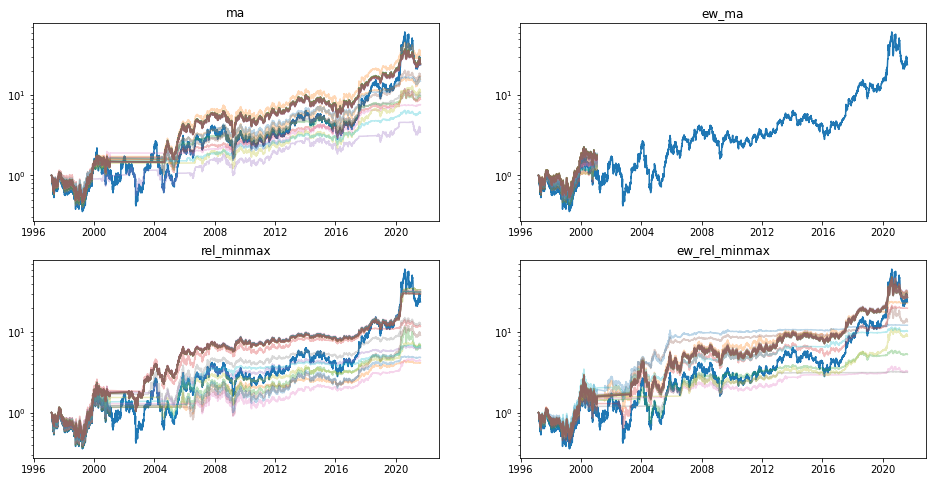

Saving QDEL params...



----------------------------------------------------------------------
                                 RDFN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.0672727064652876
Refitting current best...
Current best ma returns: 2.453560815404426
Fraction Invested: 0.9999868670684136
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 2.532664876223271
Invested: 0.9999868670684136
New best: 2.5333601577485183
Invested: 0.9999868670684136
New best: 2.5333601577485183
Invested: 0.9999868670684136
New best: 2.5288843927958498
Invested: 0.9999868670684136
New best: 2.5288843927958498
Invested: 0.9999868670684136
New best: 2.528630167417239
Invested: 0.9994067780940189
New best: 2.528630167417239
Invested: 0.9994067780940189
New best: 2.528815774873146
Invested: 0.9994067780940189
New best: 2.36899639583905

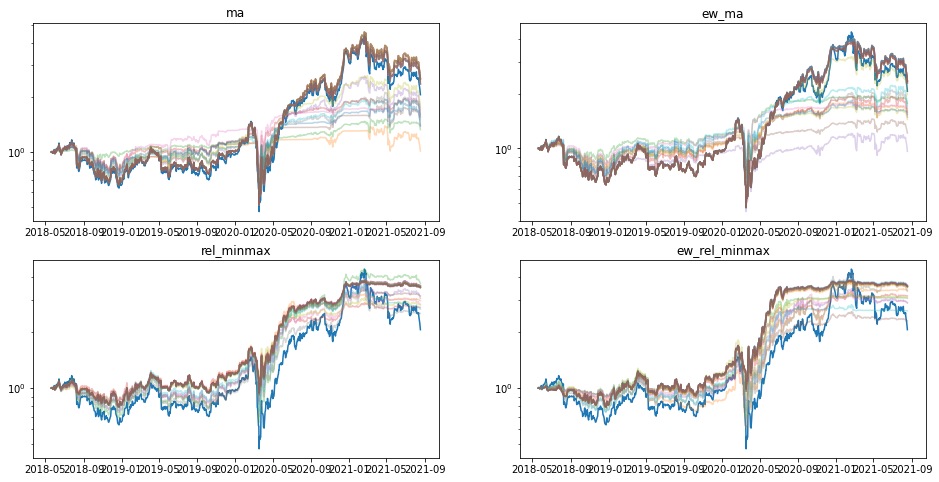

Saving RDFN params...



----------------------------------------------------------------------
                                 RGEN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 39.17999971829928
Refitting current best...
Current best ma returns: 48.62489323652953
Fraction Invested: 0.5159851781023168
Beginning random search...
New best: 42.81824963811806
Invested: 0.6306665421140562
Round: 10
Beginning adjusted search...
New best: 42.77844272775744
Invested: 0.6306665421140562
New best: 42.77844272775744
Invested: 0.6306665421140562
New best: 42.72381057222489
Invested: 0.6306665421140562
New best: 43.778497368469154
Invested: 0.6306665421140562
New best: 43.778497368469154
Invested: 0.6306665421140562
New best: 43.87773484259273
Invested: 0.6306665421140562
New best: 43.67319024321651
Invested: 0.6306665421140562
New best: 44.439228775941885


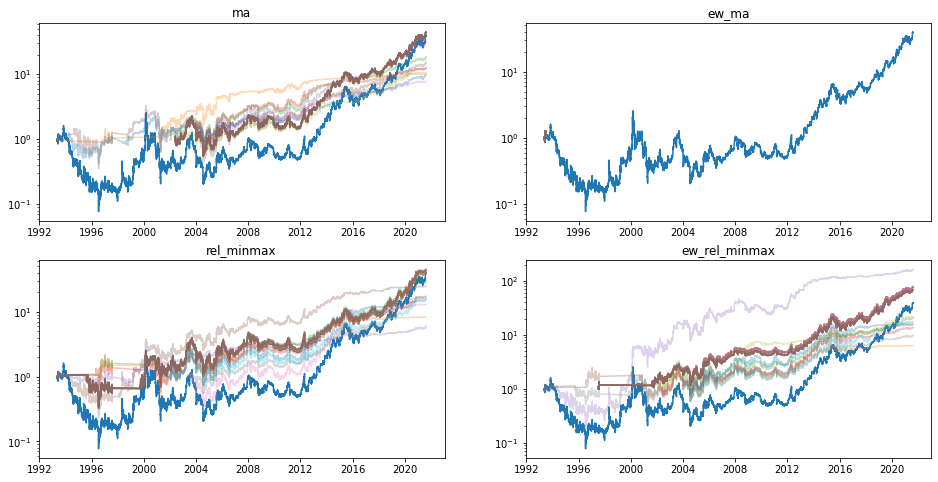

Saving RGEN params...



----------------------------------------------------------------------
                                 ROKU
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 7.495542262224055
Refitting current best...
Current best ma returns: 8.768889845740656
Fraction Invested: 0.9993899169245035
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 8.76768947608002
Invested: 0.9993899169245035
New best: 8.756522244498923
Invested: 0.9993899169245035
New best: 8.754028411741132
Invested: 0.9993899169245035
New best: 8.754418059970668
Invested: 0.9993899169245035
New best: 8.754409196756527
Invested: 0.9993899169245035
New best: 8.13481973403788
Invested: 0.9993899169245035
New best: 8.13532753466677
Invested: 0.9993899169245035
New best: 8.13520247245324
Invested: 0.9993899169245035
New best: 8.135751399750106
Investe

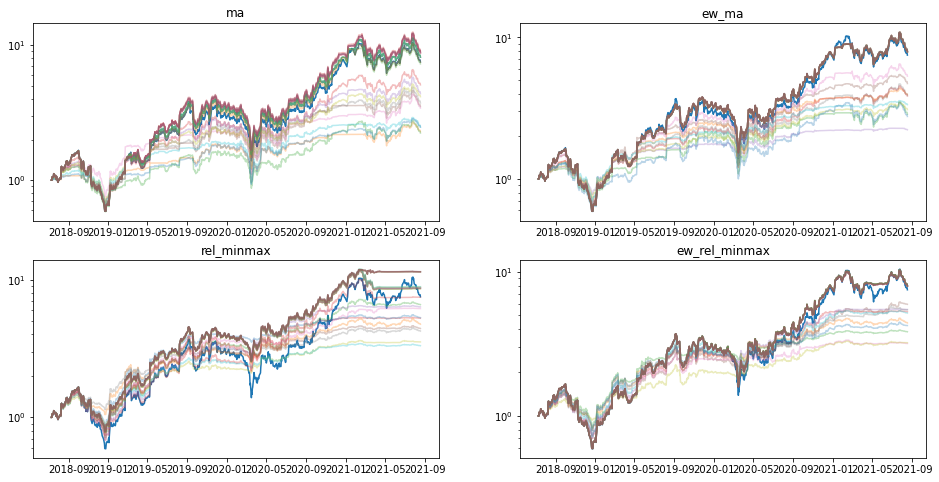

Saving ROKU params...



----------------------------------------------------------------------
                                 SE
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 23.670875516239988
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15 12


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 23.670875516239988
Refitting current best...
Current best ew_ma returns: 24.334048288181677
Fraction Invested: 0.9926979567400113
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 24.333325837692747
Invested: 0.9926979567400113
New best: 24.333370019998757
Invested: 0.9926979567400113
New best: 24.333370514040332
Invested: 0.9926979567400113
New best: 24.358006690419742
Invested: 0.9926979567400113
New best

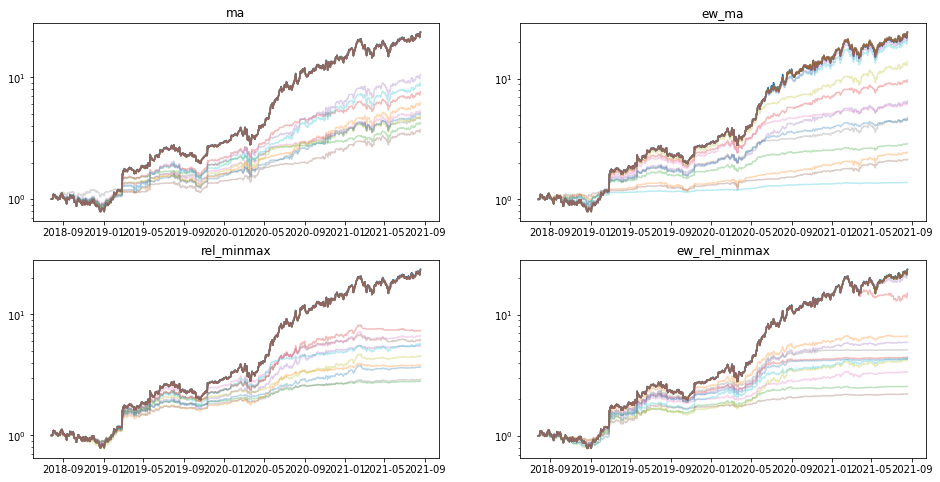

Saving SE params...



----------------------------------------------------------------------
                                 SHOP
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 38.440371429789636
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 38.440371429789636
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 38.440371429789636
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_rel_minmax method...
---------------

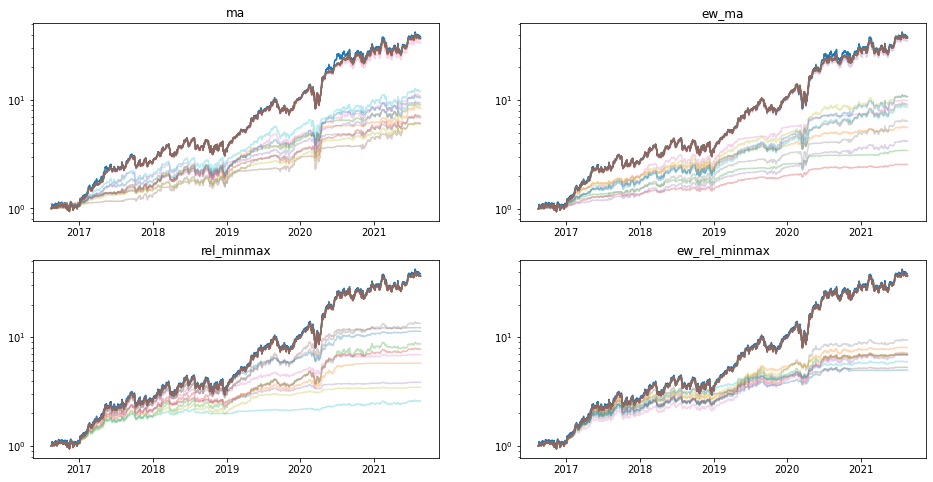

Saving SHOP params...



----------------------------------------------------------------------
                                 TDOC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 7.427726555293635
Refitting current best...
Current best ma returns: 7.471160568118946
Fraction Invested: 0.9953506292332943
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 7.4711185391895265
Invested: 0.9953506292332943
New best: 7.463397466178326
Invested: 0.9798730302439407
New best: 7.466926813650248
Invested: 0.9798730302439407
New best: 7.494167012118692
Invested: 0.9798730302439407
New best: 7.482150433567237
Invested: 0.9798730302439407
New best: 7.478825434833925
Invested: 0.9798730302439407
New best: 7.463688733641153
Invested: 0.9798730302439407
New best: 7.465896935141963
Invested: 0.9798730302439407
New best: 7.489677586669626
In

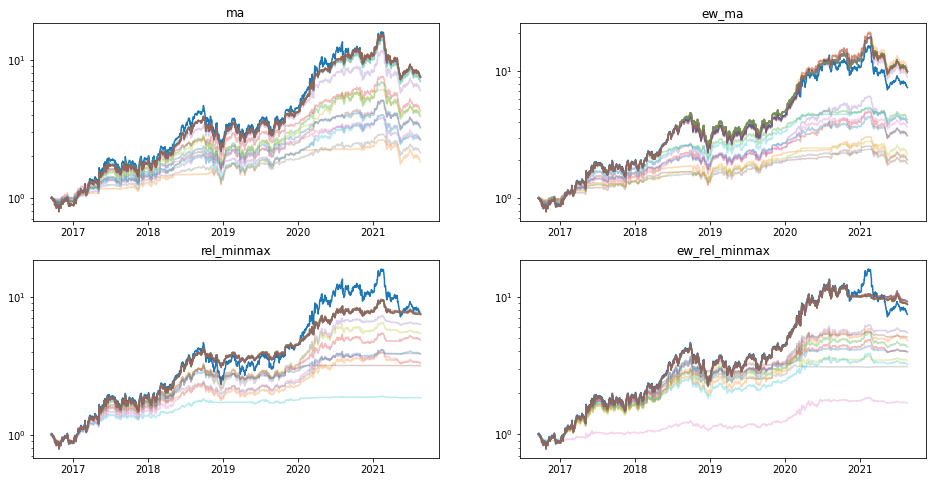

Saving TDOC params...



----------------------------------------------------------------------
                                 TEAM
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 12.23216238755555
Refitting current best...
Current best ma returns: 13.808109040186428
Fraction Invested: 0.00255797811935167
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 13.669031989857137
Invested: 0.00255797811935167
New best: 13.431338245465753
Invested: 0.00255797811935167
New best: 13.296550170772338
Invested: 0.00255797811935167
New best: 13.19187654552787
Invested: 0.00255797811935167
New best: 13.19072879588139
Invested: 0.00255797811935167
New best: 13.239590721481983
Invested: 0.00255797811935167
New best: 13.271573775009816
Invested: 0.00255797811935167
New best: 13.265895224229409
Invested: 0.00255797811935167
New best: 13.26

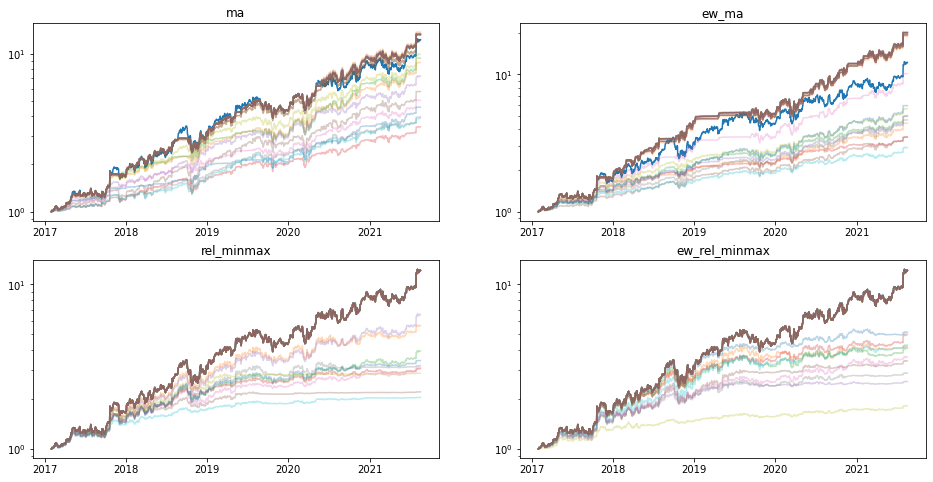

Saving TEAM params...



----------------------------------------------------------------------
                                 TREX
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 23.965268257135996
Refitting current best...
Current best ma returns: 47.3592187090041
Fraction Invested: 0.7587716328532969
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 47.34102924742355
Invested: 0.7587716328532969
New best: 47.075975172014985
Invested: 0.7587716328532969
New best: 47.11177361786379
Invested: 0.7587716328532969
New best: 43.485639654069715
Invested: 0.7587716328532969
New best: 43.554740296261656
Invested: 0.7587716328532969
New best: 43.73700993191623
Invested: 0.7587716328532969
New best: 43.78631668764653
Invested: 0.7587716328532969
New best: 43.97286239244416
Invested: 0.7587716328532969
New best: 44.27088043180173


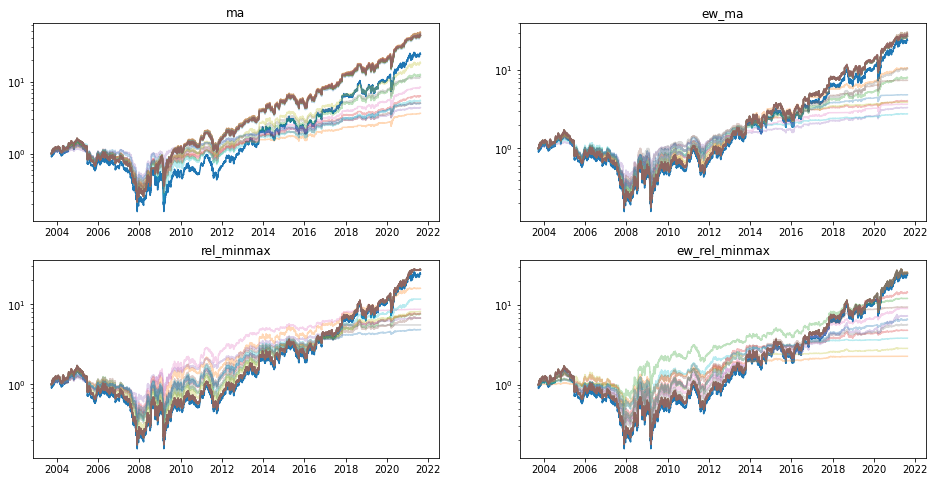

Saving TREX params...



----------------------------------------------------------------------
                                 ^GSPC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 15.483004329802014
Refitting current best...
Current best ma returns: 15.881883716628192
Fraction Invested: 0.9933360511613009
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 15.87589740139667
Invested: 0.9933360511613009
New best: 15.874809326888709
Invested: 0.9933360511613009
New best: 15.878814726199302
Invested: 0.9933360511613009
New best: 15.8794847562577
Invested: 0.9933360511613009
New best: 15.8794847562577
Invested: 0.9933360511613009
New best: 15.880010438960102
Invested: 0.9933360511613009
New best: 15.854305827324142
Invested: 0.9913722212307609
New best: 15.768685096603772
Invested: 0.9848206387373731
New best: 15.768388662591

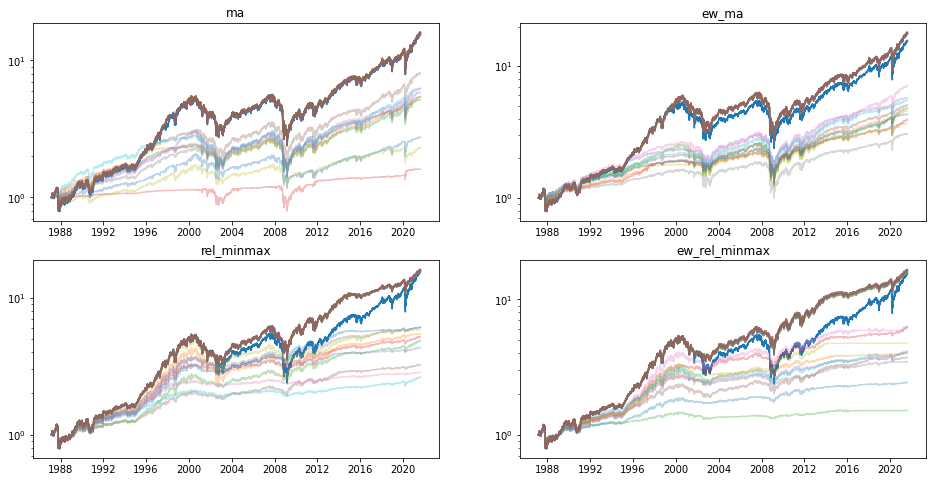

Saving ^GSPC params...


In [14]:
N_RAND = 10
N_ADJ = 15

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    try:
        best_params, best_returns = read_best_params(stock)
        stock_data = get_stock_data(stock, data)
        if stock == 'INTG':
            stock_data.fillna(method='ffill', inplace=True)
            stock_data.fillna(method='bfill', inplace=True)
        qp = QPercent(stock_data, 
                      N_CUTS, 
                      best_param_set=best_params, 
                      best_returns=best_returns, 
                      sd=SD)
        qp.run_sims(N_RAND, N_ADJ)
        best = get_best_param_set(qp)
        save_best_param_set(best, stock)
    except BaseException as e:
        print(f'Error encountered\n{e}')

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


PINS:
  Best Return: 2.146781512623006 (ew_ma)
  99.84% in

PTON:
  Best Return: 4.8096466062929775 (rel_minmax)
  8.99% in

QDEL:
  Best Return: 30.71035872187595 (ew_rel_minmax)
  38.89% in

RDFN:
  Best Return: 3.545406754767796 (ew_rel_minmax)
  11.62% in

RGEN:
  Best Return: 68.1506632639665 (ew_rel_minmax)
  9.14% in

ROKU:
  Best Return: 11.398371791914416 (rel_minmax)
  0.89% in

SE:
  Best Return: 23.92387753188281 (ew_ma)
  99.27% in

SHOP:
  Best Return: 38.440371429789636 (ma)
  100.00% in

TDOC:
  Best Return: 9.726539535004582 (ew_ma)
  100.00% in

TEAM:
  Best Return: 20.075689477691146 (ew_ma)
  3.85% in

TREX:
  Best Return: 43.93980575318465 (ma)
  75.88% in

^GSPC:
  Best Return: 17.830850753406224 (ew_ma)
  93.16% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq